In [5]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 
df = pd.read_csv('./datasets/Housing_Modified.csv') # Cargar datos
# Convertir campos binarios a campos booleanos numéricos
lb = preprocessing.LabelBinarizer()
df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)
# Crea variables dummy para stories
df_stories = pd.get_dummies(df['stories'], prefix='stories', drop_first=True)
df = pd.concat([df, df_stories], axis=1)    # Unirlas al dataset
del df['stories']
# Codificar las dummies como numéricas 1 = True, 0=False para hacer cálculos
df['stories_one'] = df['stories_one'].map({True:1, False:0})
df['stories_two'] = df['stories_two'].map({True:1, False:0})
df['stories_three'] = df['stories_three'].map({True:1, False:0})
# Definir el problema: target ~ predictoras
predictoras = ['lotsize', 'bathrms','driveway', 'recroom', 'fullbase', 'gashw', 'airco', 
'garagepl', 'prefarea', 'stories_one','stories_two','stories_three']
X = df[predictoras]
y = df['price']
# Dividir datos en 80/20 para train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)
# crea y entrena un modelo de mínimos cuadrados ordinario e imprimir resumen
import statsmodels.api as sm
x = X_train
y = y_train
x = sm.add_constant(x)
ols = sm.OLS(y,x).fit()
print(ols.summary()) # Resumen estadístico del modelo
# Hacer predicciones sobre el dataset test
y_train_pred = ols.predict(x)
X_test = sm.add_constant(X_test)
y_test_pred = ols.predict(X_test)
print( "Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print( "Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print( "Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print( "Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     75.77
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           2.38e-97
Time:                        18:45:28   Log-Likelihood:                -4810.4
No. Observations:                 436   AIC:                             9647.
Df Residuals:                     423   BIC:                             9700.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.818e+04   4719.573      5.971

#### Dibujar residuos con leverage 

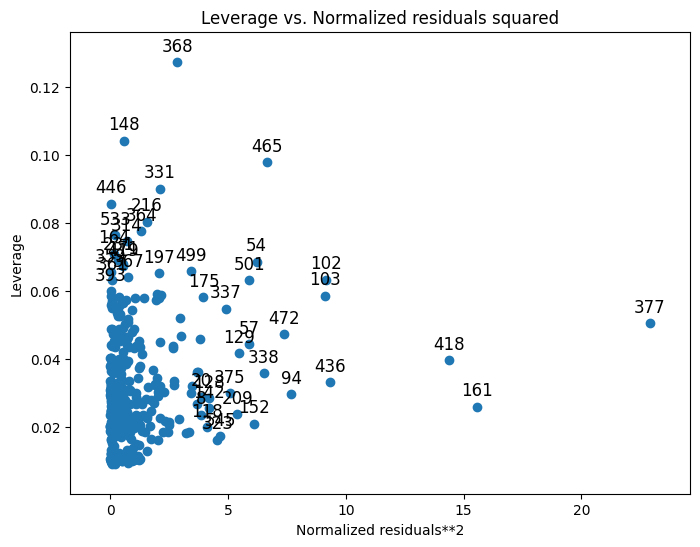

In [6]:
# Dibujamos los residuos normalizados contra el leverage
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(ols, ax = ax)

#### Aplicar el test de outliers de Bonferroni.

273    1.0
40     1.0
397    1.0
339    1.0
411    1.0
      ... 
129    1.0
144    1.0
72     1.0
235    1.0
37     1.0
Name: bonf(p), Length: 436, dtype: float64
Puntos de datos malos (bonf(p) < 0.05):      student_resid       unadj_p   bonf(p)
161       4.004005  7.358170e-05  0.032082
377       4.970358  9.733744e-07  0.000424


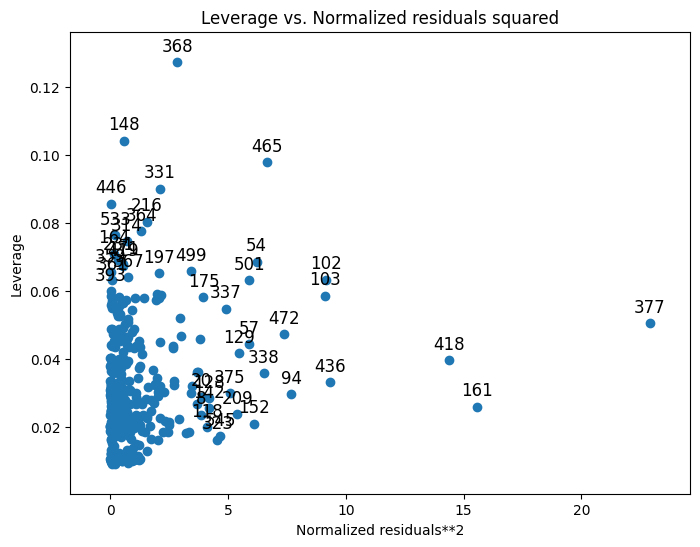

In [7]:
# Encontrar los outliers con el test de outliers de Bonferroni
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(ols, ax = ax)
test = ols.outlier_test()
print(test['bonf(p)'])
print('Puntos de datos malos (bonf(p) < 0.05):', test[test['bonf(p)'] < 0.05])

#### Ejecutar un test de homosteceidad



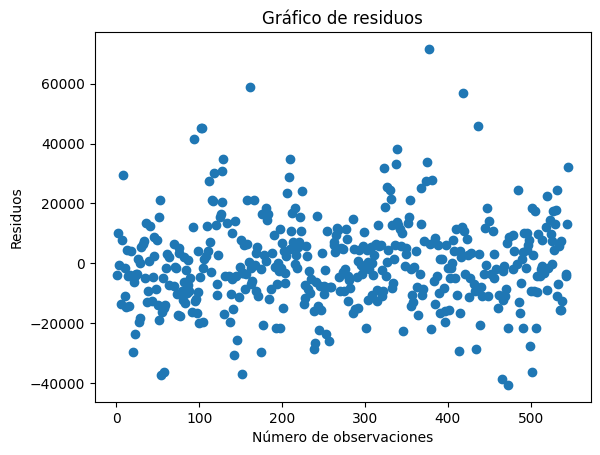

(array([  9.,  26., 103., 145., 100.,  32.,  13.,   5.,   2.,   1.]),
 array([-40639.54662268, -29410.66000903, -18181.77339539,  -6952.88678174,
          4275.99983191,  15504.88644556,  26733.77305921,  37962.65967286,
         49191.54628651,  60420.43290015,  71649.3195138 ]),
 <BarContainer object of 10 artists>)

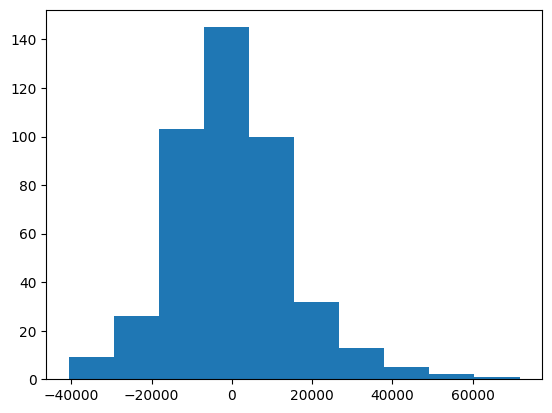

In [10]:
# Dibujar la comprobación de homoscedasticity
plt.plot(ols.resid,'o')
plt.title('Gráfico de residuos')
plt.ylabel('Residuos')
plt.xlabel('Número de observaciones')
plt.show()
plt.hist(ols.resid)

#### Genear gráficos de linealidad del target con respecto de las predictoras.

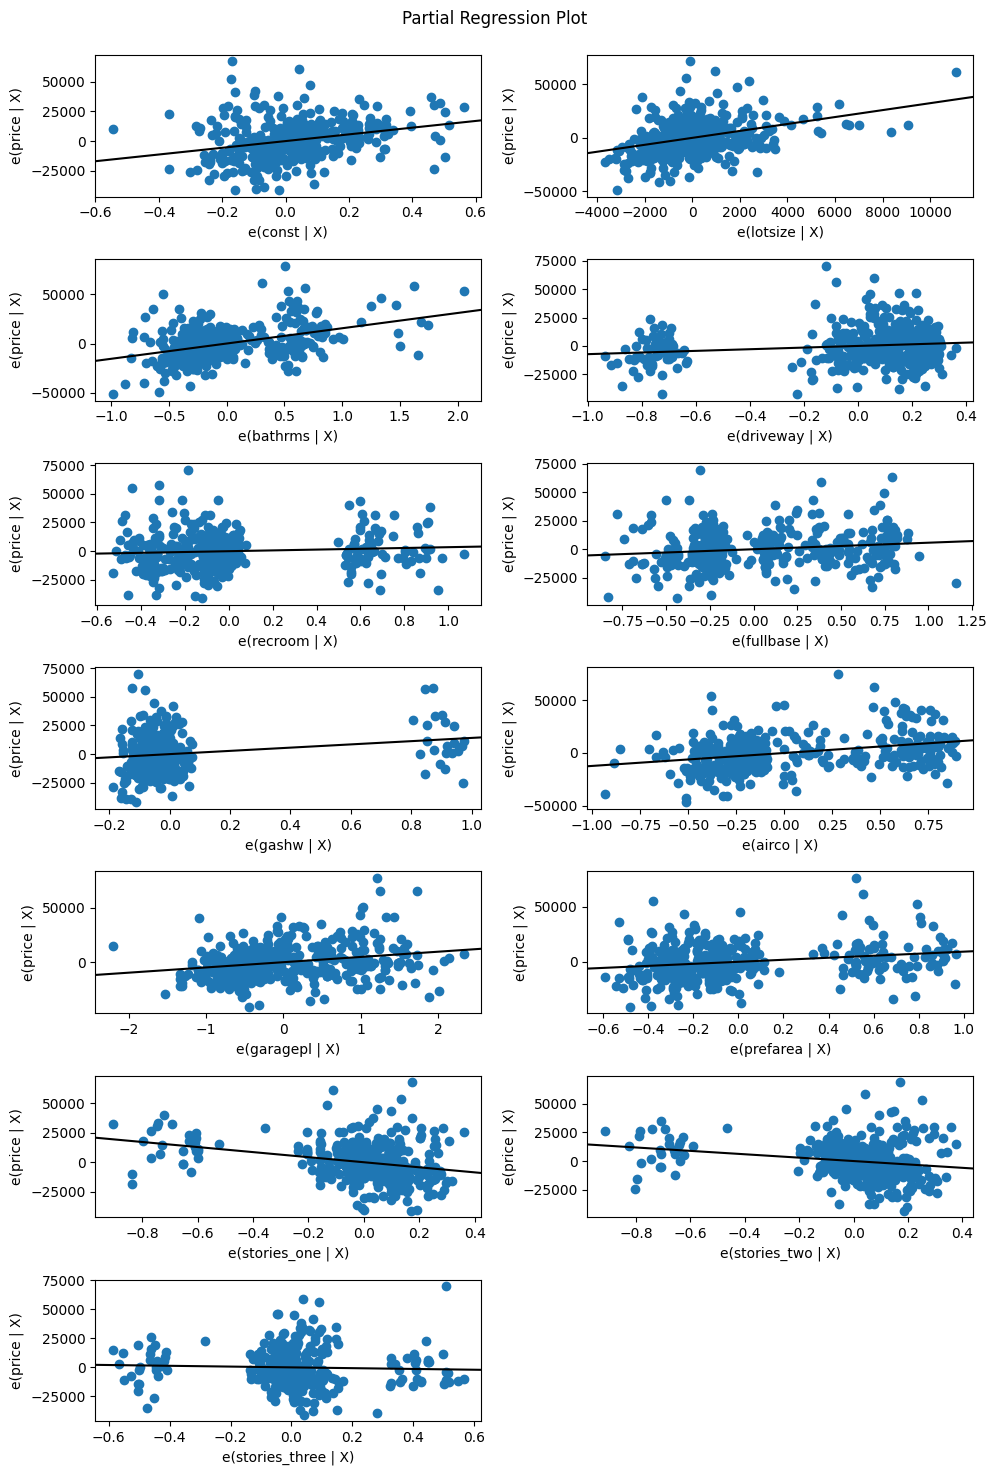

In [11]:
import statsmodels.api as sm
f= plt.figure(figsize=(10,15))
f= sm.graphics.plot_partregress_grid(ols,fig=f)
